# Завдання 1
У партії з 50 деталей 5 нестандартних. Визнач ймовірність того, що серед обраних навмання для перевірки шести деталей дві виявляться нестандартними.

## Гіпергеометричний розподіл

**Позначення:**

- \( N \) — загальна кількість деталей
- \( K \) — кількість нестандартних деталей
- \( n \) — обсяг вибірки
- \( k \) — кількість нестандартних деталей у вибірці

### Дані:

$$
N = 50,\quad K = 5,\quad n = 6,\quad k = 2
$$

### Формула гіпергеометричного розподілу:

$$
P(X = k) = \frac{\binom{K}{k} \cdot \binom{N - K}{n - k}}{\binom{N}{n}}
$$

### Обчислення комбінаторних чисел:

$$
\binom{5}{2} = \frac{5!}{2!(5-2)!} = 10
$$

$$
\binom{45}{4} = \frac{45!}{4!(45-4)!} = 148995
$$

$$
\binom{50}{6} = \frac{50!}{6!(50 - 6)!} = 15890700
$$

### Підставимо у формулу:

$$
P(X = 2) = \frac{10 \cdot 148995}{15890700} \approx 0.09
$$

### Висновок:

Ймовірність того, що серед 6 випадково вибраних деталей буде рівно 2 нестандартні деталі, становить приблизно **9%**.

# Завдання 2
В тирі стрілець проводить 7 пострілів по мішені з ймовірністю влучання кожного 0.8. Яка ймовірність того, що буде не менше за 5 влучань?
Розв'яжи аналітично.

## Біноміальний розподіл — ймовірність щонайменше 5 влучань

### Умова

- \( X \) — кількість влучань із 7 пострілів
- \( n = 7 \) — кількість пострілів
- \( p = 0.8 \) — ймовірність влучання

### Знайти

Ймовірність того, що буде не менше 5 влучань:

$$
P(X \geq 5) = P(5) + P(6) + P(7)
$$

### Формула біноміального розподілу

$$
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}
$$

### Обчислення

**Для \( k = 5 \):**

$$
P(5) = \binom{7}{5} \cdot 0.8^5 \cdot (1 - 0.8)^2 = 21 \cdot 0.33 \cdot 0.04 \approx 0.28
$$

**Для \( k = 6 \):**

$$
P(6) = \binom{7}{6} \cdot 0.8^6 \cdot (1 - 0.8)^1 = 7 \cdot 0.26 \cdot 0.2 \approx 0.37
$$

**Для \( k = 7 \):**

$$
P(7) = \binom{7}{7} \cdot 0.8^7 \cdot (1 - 0.8)^0 = 1 \cdot 0.21 \cdot 1 \approx 0.21
$$

### Підсумок

$$
P(X \geq 5) = 0.28 + 0.37 + 0.21 = 0.86
$$

### Висновок

Ймовірність того, що стрілець влучить щонайменше 5 разів із 7 пострілів, приблизно дорівнює **86%**.

# Завдання 3
Підкидають три гральні кубики. Що ймовірніше: отримати в сумі очок, що випали, 11 або 12? Розв’яжи програмно, згенерувавши всі можливі комбінації.

In [28]:
import itertools
from itertools import repeat

def get_dice_combinations(dices: int):
    return tuple(itertools.product(*repeat(range(1, 7), dices)))

def get_dice_sum(dices: int):
    all_combinations = get_dice_combinations(dices)
    all_sums = tuple(sum(i) for i in all_combinations)
    sums_set = set(all_sums)
    return {k:all_sums.count(k) for k in sums_set}

combination_sums_for_3 = get_dice_sum(3)
combination_11 = combination_sums_for_3[11]
combination_12 = combination_sums_for_3[12]

print(f"Кількість перестановок для 11 очків: {combination_11}")
print(f"Кількість перестановок для 12 очків: {combination_12}")
if combination_11 > combination_12:
    print("Більш правдоподібним є випадання 11")
elif combination_11 < combination_12:
    print("Більш правдоподібним є випадання 12")
else:
    print("Ймовірність випадання 11 і 12 очків є однаковим")

Кількість перестановок для 11 очків: 27
Кількість перестановок для 12 очків: 25
Більш правдоподібним є випадання 11


# Завдання 4

Схема електричного ланцюга наведена на рисунку. Через ділянку схеми, що вийшла з ладу, струм **не проходить**.
Нехай подія \( A_i \) — вихід з ладу елемента \( i \), \( i = \overline{1,6} \).

Вирази події \( A \) та \( \bar{A} \) через події \( A_i \), якщо \( A \) — вихід з ладу всієї схеми.

**🔎 Примітка:** Виразити необхідно саме через **події**, а не через імовірності.

# Логічне перетворення виразу A₁₆ через заперечення

## Початкові означення

- $$ A_{12} = A_1 \cap A_2 $$
- $$ A_{34} = A_3 \cap A_4 $$
- $$ A_{35} = (A_3 \cap A_4)^c \cup A_5 = (A_3 \cup A_5) \cap (A_4^c \cup A_5) $$

---

## Побудова виразу A₁₆

$$
\begin{aligned}
A_{16} &= A_{12} \cap A_{35} \cap A_6 \\
       &= (A_1 \cap A_2) \cap ((A_3 \cup A_5) \cap (A_4^c \cup A_5)) \cap A_6 \\
       &= A_1 \cap A_2 \cap A_6 \cap (A_3 \cup A_5) \cap (A_4^c \cup A_5)
\end{aligned}
$$

---

## Виражаємо через заперечення

$$
\overline{A_{16}} = \overline{A_1 \cap A_2 \cap (A_3 \cup A_5) \cap (A_4^c \cup A_5) \cap A_6}
$$

Згідно з законом Де Моргана:

$$
\overline{A \cap B \cap C \cap D \cap E} = \overline{A} \cup \overline{B} \cup \overline{C} \cup \overline{D} \cup \overline{E}
$$

Тоді:

$$
\begin{aligned}
\overline{A_{16}} &= \overline{A_1} \cup \overline{A_2} \cup \overline{A_3 \cup A_5} \cup \overline{A_4^c \cup A_5} \cup \overline{A_6} \\
                  &= \overline{A_1} \cup \overline{A_2} \cup (\overline{A_3} \cap \overline{A_5}) \cup (A_4 \cap \overline{A_5}) \cup \overline{A_6}
\end{aligned}
$$

---

## Остаточне спрощення

$$
\begin{aligned}
\overline{A_{16}} &= \overline{A_1} \cup \overline{A_2} \cup A_4 \cup \overline{A_6} \cup \left( \overline{A_5} \cap (\overline{A_3} \cup A_4 \cup \overline{A_6}) \right)
\end{aligned}
$$

# Завдання 5
На площині накреслені дві концентричні окружності (мають спільний центр), радіуси яких 5 і 10 см відповідно. Знайди ймовірність того, що точка, кинута навмання у велике коло, потрапить також у кільце, утворене побудованими окружностями. Розв’яжи аналітично.

# Задача про ймовірність потрапляння у кола

Нехай маємо два концентричні кола:
- \( A \) — зовнішнє коло,
- \( B \) — внутрішнє коло,
- \( A_1 \) — подія "потрапляння в зовнішнє коло",
- \( B_1 \) — подія "потрапляння у внутрішнє коло".

З рисунка видно, що:
- \( B \subset A \Rightarrow B_1 \subset A_1 \),
- Отже, \( A_1 = \Omega \) (всі результати, коли вже потрапили в зовнішнє коло).

---

### Застосування правила добутку

Оскільки $$B_1 \subset A_1$$, то:

$$
B_1 \cap A_1 = B_1
$$

---

### Висновок

Оскільки \( B \) займає 50% площі кола \( A \), то:

Ймовірність потрапляння в кільце \(тобто $ A_1 \setminus B_1 $ \) дорівнює **50%**.

# Завдання 6
Урна містить одну кулю, про яку відомо, що вона або біла, або чорна з однаковими ймовірностями. В урну кладуть білу кулю і потім навмання виймають одну кулю. Вона виявилася білою. Яка ймовірність того, що куля, яка залишилася, є білою? Розв’яжи аналітично.

# Ймовірність витягування кулі

## Умова задачі

Є дві кулі:

- **Біла** — покладена першою в урну.
- **Чорна** — знаходиться в урні разом з білою.

Після цього з урни **випадково витягують одну кулю**.

---

## Позначення

- $p$ — ймовірність витягнути **білу кулю**.
- $q$ — ймовірність витягнути **чорну кулю**.

---

## Розв'язок

Оскільки в урні дві кулі — одна біла, одна чорна — і витягуємо **випадкову**:

- $p = 0.5$
- $q = 1 - p = 0.5$

---

## Висновок

**Ймовірність витягнути білу або чорну кулю становить по 50%.**

# Завдання 7. Випадкове блукання
Ціна акцій компанії в кожен момент часу може з рівною ймовірністю збільшитись на 2 або зменшитись на 1. У початковий момент часу
t=0 ціна рівна 0. Визнач середню ціну акції через 3 одиниці часу (t=3).

- Розв’яжи аналітично.
- Напиши симуляцію даного процесу. Порахуй середнє значення та намалюй гістограму ціни для 10, 100, 1000 та 10000 симуляцій.

# Очікувана ціна акції через 3 кроки

## Умова

Маємо модель ціни акції, яка змінюється на кожному кроці за такими правилами:

- З імовірністю $p = 0.5$ ціна зростає на $+2$.
- З імовірністю $q = 0.5$ ціна падає на $-1$.
- Початкова ціна: $X_0 = 0$.
- Потрібно знайти математичне сподівання ціни акції через 3 кроки: $\mathbb{E}[X_3]$.

---

## Математичне сподівання одного кроку

$$
\mathbb{E}[\text{1 крок}] = (+2) \cdot 0.5 + (-1) \cdot 0.5 = 1 - 0.5 = 0.5
$$

---

## Загальне математичне сподівання через 3 кроки

Оскільки кроки незалежні, використовуємо лінійність математичного сподівання:

$$
\mathbb{E}[X_3] = 3 \cdot \mathbb{E}[\text{1 крок}] = 3 \cdot 0.5 = 1.5
$$

---

## Висновок

Середнє (очікуване) значення ціни акції після 3 кроків становить **1.5**.

In [29]:
import numpy as np

def calculate_fair_stock_price(time: int, p: float, p_step: float, q: float, q_step: float):
    mean_step = p_step * p + q_step * q
    return time * mean_step

def simulate_stock_price(start_price: float, times: int, q_step: float, p_step: float):
    return start_price + sum((int(np.random.choice([q_step, p_step])) for _ in range(times)))

progress_steps = [10, 100, 1000, 10000]
expectations = [calculate_fair_stock_price(s, 0.5, 2, 0.5, -1) for s in progress_steps]
simulations = [simulate_stock_price(0, s, -1, 2) for s in progress_steps]

for payloads, steps in zip(zip(expectations, simulations), progress_steps):
    print(f"Розрахунок сподівання ціни акції за {steps} кроків: {payloads[0]:.2f}")
    print(f"Симульована ціна акції за {steps} кроків: {payloads[1]:.2f}")

Розрахунок сподівання ціни акції за 10 кроків: 5.00
Симульована ціна акції за 10 кроків: 8.00
Розрахунок сподівання ціни акції за 100 кроків: 50.00
Симульована ціна акції за 100 кроків: 74.00
Розрахунок сподівання ціни акції за 1000 кроків: 500.00
Симульована ціна акції за 1000 кроків: 458.00
Розрахунок сподівання ціни акції за 10000 кроків: 5000.00
Симульована ціна акції за 10000 кроків: 5030.00


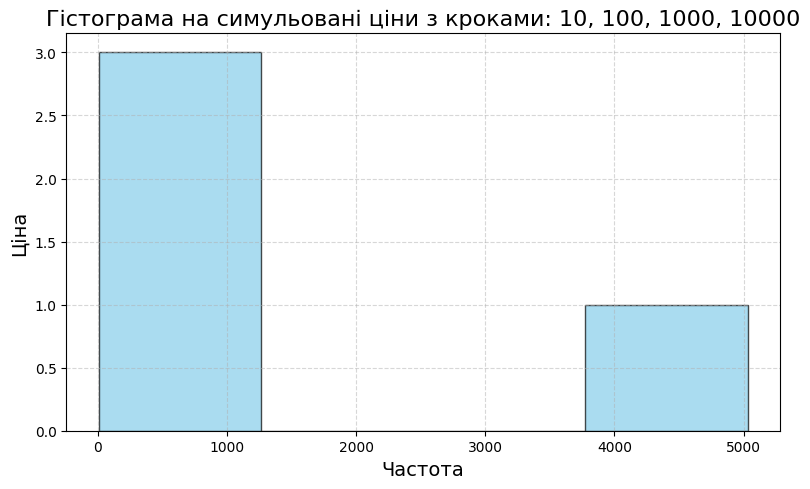

In [34]:
from matplotlib import pyplot as plt

def build_hist(data: list, title: str, x_label: str, y_label: str):
    # Створюємо гістограму
    plt.figure(figsize=(8, 5))  # розмір графіка
    plt.hist(data, bins=len(data), color='skyblue', edgecolor='black', alpha=0.7)

    # Додаємо підписи
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    # Додаємо сітку
    plt.grid(True, linestyle='--', alpha=0.5)

    # Показуємо графік
    plt.tight_layout()
    plt.show()

build_hist(simulations, title=f"Гістограма на симульовані ціни з кроками: {', '.join(map(lambda s: str(s), progress_steps))}", x_label="Частота", y_label="Ціна")